In [8]:
import lbg_forecast.sps as sps
import lbg_forecast.sfh as sfh
import lbg_forecast.population_model as pop
import lbg_forecast.cosmology as cosmo
import lbg_forecast.emulator as em
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np

In [2]:
sps_model=sps.initialise_sps_model(neb_em=True, imf_type=1)
mimic = em.fsps_emulator("./")

(3.631e-34, 5.754747181826305e-27)

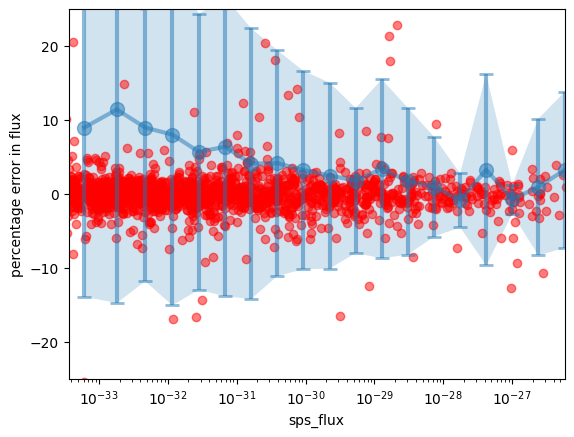

In [24]:
def mab_to_flux(mag):
    return 3.631e-20*10**(-(mag/2.5))

def quantile(data):
    return np.quantile(data, 0.95)

phot_defaults = []
phot_betas = []
em1 = []

nsamples = 5000
samples=[]
samples_em=[]
phot_defaults = []
for sample in range(nsamples):
    #logsfrratios = pop.prospector_beta_sfh_prior(10, z, 9, 0.3)[0, :]
    logsfrratios = np.random.uniform(-5.0, 5.0, 6)
    redshift = np.random.uniform(0.0, 7.0)
    sps_params = np.array([redshift, np.random.uniform(-2.5, 0.5), np.random.uniform(0.0, 4.0),
                            np.random.uniform(0.0, 4.0), np.random.uniform(-2.2, 0.4),
                              np.random.uniform(0.0, 2.0), np.random.uniform(-4.0, -1.0),
                                np.random.uniform(-2.0, 0.5), 10**np.random.uniform(-5.0, 1.0), np.random.uniform(5, 150),
                                  -1.0, 0.0, 4.0, 0.0, 0.0, 1.0, 10**np.random.uniform(7.0,13.0)])
    sps_params[10:-1] = logsfrratios

    sps_param_resize = sps_params.reshape((1, sps_params.shape[0]))
    emu = mab_to_flux(mimic.mimic_photometry(sps_param_resize, 1)[0]+cosmo.wmap1_to_9(redshift))
    em1.append(emu[0])

    sps.update_model(sps_model, sps_params, False, sfh.default_agebins(), binscale=sfh.zred_to_agebins)
    phot_default = mab_to_flux(sps.get_magnitudes(sps_model, filters="lsst", cosmology=cosmo.get_wmap9(), lya_uncertainity=False, path="./"))
    phot_defaults.append(phot_default[0])

    sps.update_model(sps_model, sps_params, False, sfh.default_agebins(), binscale=sfh.zred_to_agebins_pbeta)
    phot_beta = mab_to_flux(sps.get_magnitudes(sps_model, filters="lsst", cosmology=cosmo.get_wmap9(), lya_uncertainity=False, path="./"))
    phot_betas.append(phot_beta[0])

    diff = ((phot_beta-phot_default)/phot_default)*100
    samples.append(diff[0])

    em_diff = ((emu-phot_default[:-1])/phot_default[:-1])*100
    samples_em.append(em_diff[0])




phot_defaults = np.array(phot_defaults)
phot_betas = np.array(phot_betas)
em1 = np.array(em1)
samples = np.array(samples)
samples_em = np.array(samples_em)
em1 = np.array(em1)
#print(phot_default[:, 0]-phot_beta[:, 0])

min_flux = mab_to_flux(35)
max_flux = mab_to_flux(17)

bin_means, bin_edges, binnumber = sc.stats.binned_statistic(phot_defaults, samples,'mean', np.logspace(np.log10(min_flux), np.log10(max_flux), 20))
bin_std, bin_edges, binnumber = sc.stats.binned_statistic(phot_defaults, samples, 'std', np.logspace(np.log10(min_flux), np.log10(max_flux), 20))
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.errorbar(bin_centers, bin_means, bin_std, alpha=0.5, ms=20, marker=".", elinewidth=3, capsize=5, capthick=2, lw=3)
plt.fill_between(bin_centers, bin_means-bin_std, bin_means+bin_std, alpha=0.2)
plt.scatter(phot_defaults, samples_em, c='red', alpha=0.5)
#nbands=5
#for i in range(nbands):
#    diff = (phot_default-phot_betav)[:, i]/phot_beta[:, i]
#    plt.plot(redshift, diff)

plt.xlabel("sps_flux")
plt.ylabel("percentage error in flux")
plt.xscale("log")


plt.ylim(-25, 25)
plt.xlim(min_flux, max_flux)

(3.631e-34, 5.754747181826305e-27)

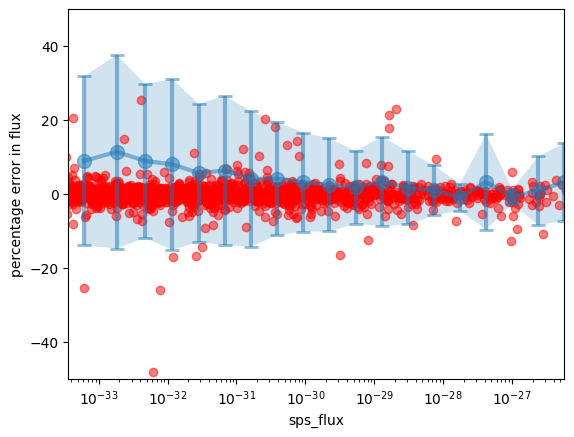

In [28]:
min_flux = mab_to_flux(35)
max_flux = mab_to_flux(17)

bin_means, bin_edges, binnumber = sc.stats.binned_statistic(phot_defaults, samples,'mean', np.logspace(np.log10(min_flux), np.log10(max_flux), 20))
bin_std, bin_edges, binnumber = sc.stats.binned_statistic(phot_defaults, samples, 'std', np.logspace(np.log10(min_flux), np.log10(max_flux), 20))
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.errorbar(bin_centers, bin_means, bin_std, alpha=0.5, ms=20, marker=".", elinewidth=3, capsize=5, capthick=2, lw=3)
plt.fill_between(bin_centers, bin_means-bin_std, bin_means+bin_std, alpha=0.2)
plt.scatter(phot_defaults, samples_em, c='red', alpha=0.5)
#nbands=5
#for i in range(nbands):
#    diff = (phot_default-phot_betav)[:, i]/phot_beta[:, i]
#    plt.plot(redshift, diff)

plt.xlabel("sps_flux")
plt.ylabel("percentage error in flux")
plt.xscale("log")


plt.ylim(-50, 50)
plt.xlim(min_flux, max_flux)

(3.631e-34, 5.754747181826305e-27)

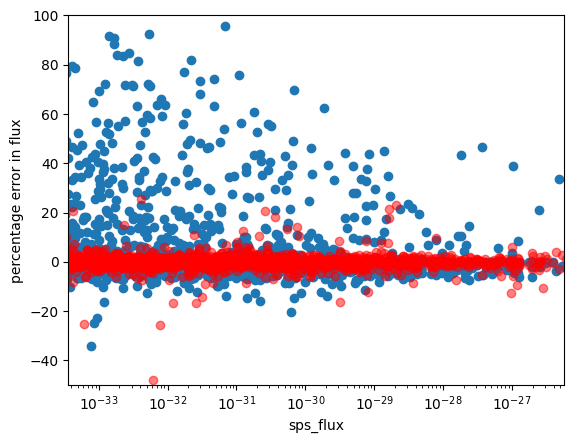

In [35]:
plt.scatter(phot_defaults, samples)
plt.scatter(phot_defaults, samples_em, c='red', alpha=0.5)
#nbands=5
#for i in range(nbands):
#    diff = (phot_default-phot_betav)[:, i]/phot_beta[:, i]
#    plt.plot(redshift, diff)

plt.xlabel("sps_flux")
plt.ylabel("percentage error in flux")
plt.xscale("log")


plt.ylim(-50, 100)
plt.xlim(min_flux, max_flux)